In [1]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point
from tqdm.notebook import tqdm

COUNTY_LIST = ['Midtown South', 'NoMad']

In [10]:
buildings = pd.read_csv('pw_buildings_nomad_midtown_2024_03_06.csv')
shapes = gpd.read_file('NoMad_Midtown South Changes.geojson')['geometry']

buildings.columns = ['building_id', 'centroid_latitude', 'centroid_longitude', 'name']
buildings['centroid'] = [Point(x,y) for x,y in zip(buildings['centroid_longitude'], buildings['centroid_latitude'])]

def new_neighborhood(p):
    for i in range(len(shapes)):
        if shapes[i].contains(p):
            return COUNTY_LIST[i]

    return None

buildings['new_name'] = [new_neighborhood(x) for x in tqdm(buildings['centroid'], total=len(buildings))]
buildings_to_change = buildings[((buildings['name'] != buildings['new_name']))]# & (buildings['new_name'].isin(COUNTY_LIST))) | (~(buildings.centroid_latitude.isna()) & (buildings['name'].isin(COUNTY_LIST)) & (buildings['new_name'].isna()))]
buildings_to_change[['building_id', 'name', 'new_name']].to_csv('buildings_to_change.csv', index=False)

  0%|          | 0/838 [00:00<?, ?it/s]

In [3]:
x = gpd.read_file('NoMad_Midtown South Changes.geojson')
x.loc[0,'layer'] = 'Midtown South'
x.loc[1, 'layer'] = 'NoMad'

In [4]:
x

,layer,path,geometry
0,Midtown South,NaN,"MULTIPOLYGON (((-73.98806 40.74744, -73.98915 ..."
1,NoMad,NaN,"MULTIPOLYGON (((-73.98806 40.74744, -73.98725 ..."


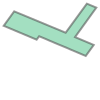

In [5]:
shapes[0]

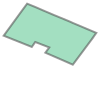

In [6]:
shapes[1]

In [7]:
x = buildings[['building_id', 'centroid', 'name', 'new_name']]
x.columns = ['layer', 'geometry', 'name', 'new_name']
x['layer'] = [str(i) for i in x['layer']]
test = pd.concat([gpd.read_file('NoMad_Midtown South Changes.geojson'), gpd.GeoDataFrame(x)])

/var/folders/_3/v349phgn4ljd3jkf3ll9p2cm0000gp/T/ipykernel_37865/4279117071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['layer'] = [str(i) for i in x['layer']]
/Users/arnavmalhotra/anaconda3/envs/pw/lib/python3.10/site-packages/geopandas/array.py:1486: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


<AxesSubplot: >

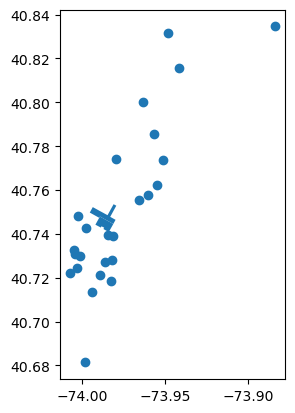

In [8]:
test[pd.isna(test['new_name'])].plot()

In [9]:
test[pd.isna(test['new_name'])]

,layer,path,geometry,name,new_name
0,NaN,NaN,"MULTIPOLYGON (((-73.98806 40.74744, -73.98915 ...",NaN,NaN
1,nomad,NaN,"MULTIPOLYGON (((-73.98806 40.74744, -73.98725 ...",NaN,NaN
27,650616,NaN,POINT (-73.97945 40.77410),Midtown South,None
339,651180,NaN,POINT (-73.96346 40.80012),Midtown South,None
340,650925,NaN,POINT (-73.96018 40.75756),Midtown South,None
341,650910,NaN,POINT (-73.94787 40.83137),Midtown South,None
342,650907,NaN,POINT (-73.88374 40.83455),Midtown South,None
343,650877,NaN,POINT (-73.99401 40.71339),Midtown South,None
344,650871,NaN,POINT (-73.98890 40.72124),Midtown South,None
345,650610,NaN,POINT (-73.95633 40.78537),Midtown South,None
